<a href="https://colab.research.google.com/github/j2damax/ml-learning-journey/blob/main/pytorch-deep-learning/01_overfitting_underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jayampathy Balasuriya - COMScDS242P-009@student.nibm.lk
# 02-08-2025

# Introduction

This notebook explains the concepts of overfitting and underfitting, common issues encountered when training machine learning and deep learning models.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Seed for reproducibility
np.random.seed(0)
_ = torch.manual_seed(0)

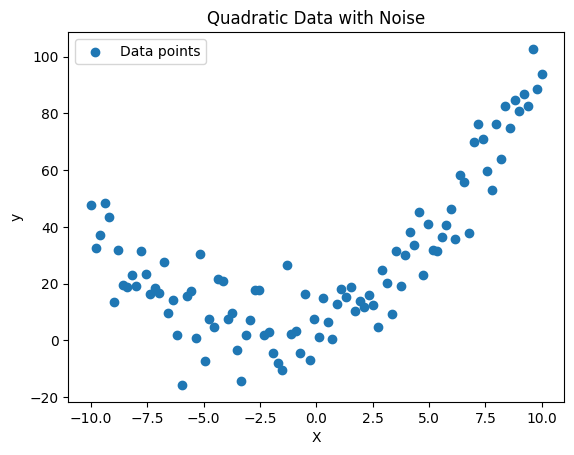

In [3]:
# Generate quadratic data with noise
def generate_data(n_samples=100):
    X = np.linspace(-10, 10, n_samples)
    y = 0.5 * X**2 + 3 * X + 10 + np.random.randn(n_samples) * 10  # Quadratic pattern with noise
    return X, y

X, y = generate_data()

# Plot the generated data
plt.scatter(X, y, label='Data points')
plt.title('Quadratic Data with Noise')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [4]:
# Simple Linear Model
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)


In [5]:
class OverfittingModel(nn.Module):
    def __init__(self):
        super(OverfittingModel, self).__init__()
        self.fc1 = nn.Linear(1, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 128)
        self.fc4 = nn.Linear(128, 32)
        self.fc5 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        return self.fc5(x)

In [21]:
def train_model(model, X_train, y_train, num_epochs=1000, learning_rate=0.001):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)
    y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

    for epoch in range(num_epochs):
        model.train()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return model

In [7]:
def plot_model(model, X, y, title):
    model.eval()
    X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(1)
    with torch.no_grad():
        y_pred = model(X_tensor).numpy()

    plt.scatter(X, y, label='Data points')
    plt.plot(X, y_pred, color='red', label='Model prediction')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

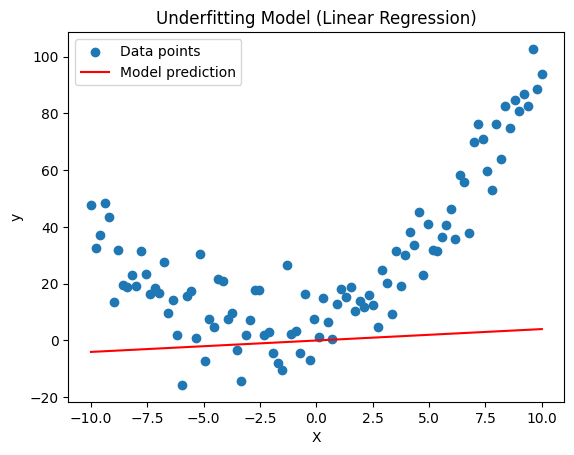

In [22]:
# Underfitting model
linear_model = LinearModel()
linear_model = train_model(linear_model, X, y, num_epochs=1000)

# Plot results for underfitting model
plot_model(linear_model, X, y, 'Underfitting Model (Linear Regression)')

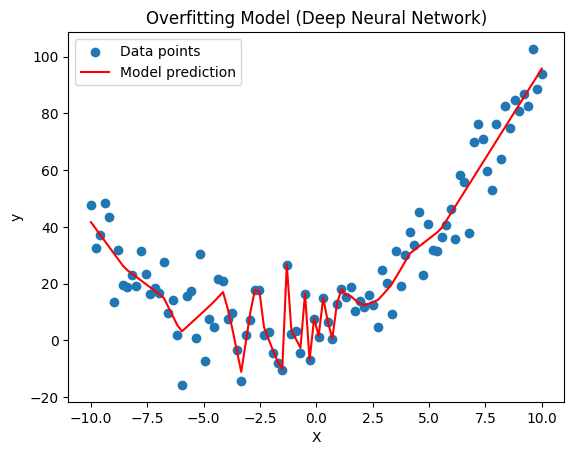

In [23]:
# Overfitting model
overfitting_model = OverfittingModel()
overfitting_model = train_model(overfitting_model, X, y, num_epochs=1000)

# Plot results for overfitting model
plot_model(overfitting_model, X, y, 'Overfitting Model (Deep Neural Network)')

In [24]:
class IdealModel(nn.Module):
    def __init__(self):
        super(IdealModel, self).__init__()
        self.fc1 = nn.Linear(1, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

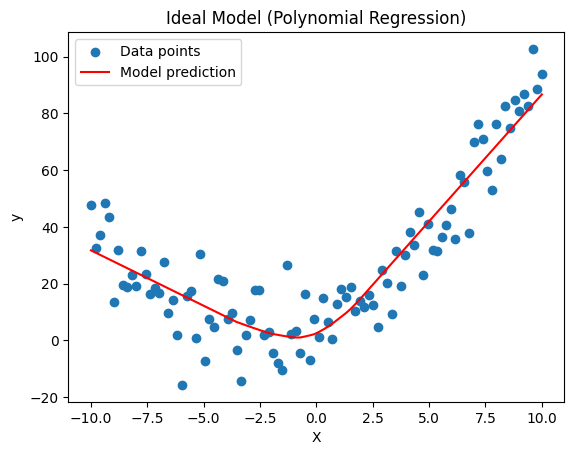

In [25]:
# Ideal model
ideal_model = IdealModel()
ideal_model = train_model(ideal_model, X, y, num_epochs=1000)

plot_model(ideal_model, X, y, 'Ideal Model (Polynomial Regression)')

# Exercise

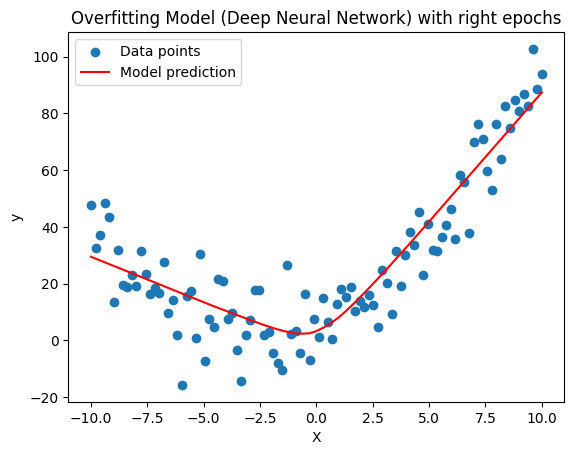

In [26]:
# Exercise 1 - Change the number of epochs in the OverfittingModel and find the right epochs that reduces the overfitting issue

# Overfitting model
overfitting_model = OverfittingModel()
overfitting_model = train_model(overfitting_model, X, y, num_epochs=100)

# Plot results for overfitting model
plot_model(overfitting_model, X, y, 'Overfitting Model (Deep Neural Network) with right epochs')

In [ ]:
# Exercise 2 - Change the number of neurons in the hidden layers of the OverfittingModel and find the right model architecture that reduces the overfitting issue

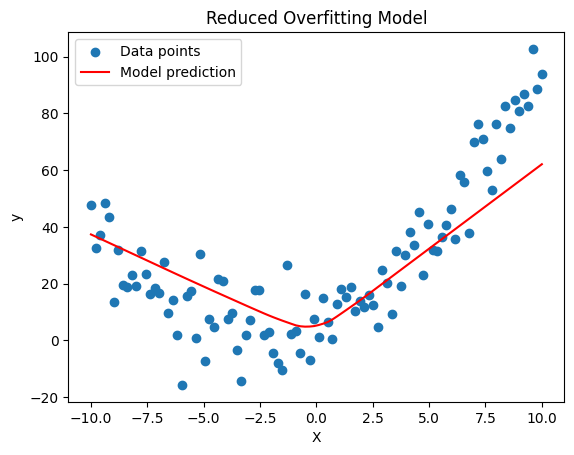

In [27]:
class ReducedOverfittingModel(nn.Module):
    def __init__(self):
        super(ReducedOverfittingModel, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 8)
        self.fc5 = nn.Linear(8, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        return self.fc5(x)

# Train the reduced overfitting model
reduced_overfitting_model = ReducedOverfittingModel()
reduced_overfitting_model = train_model(reduced_overfitting_model, X, y, num_epochs=100)

# Plot results for the reduced overfitting model
plot_model(reduced_overfitting_model, X, y, 'Reduced Overfitting Model')

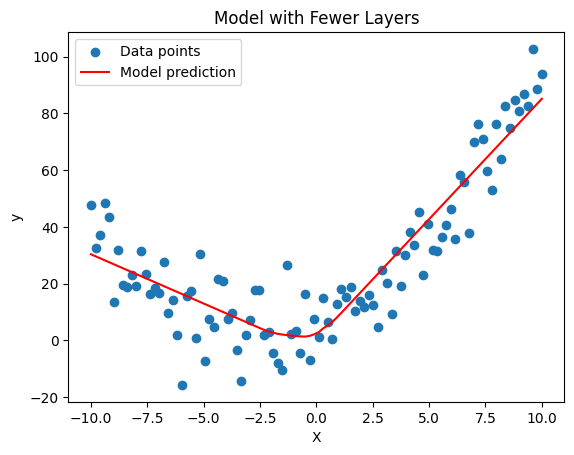

In [28]:
# Exercise 3 - Change the layers of the OverfittingModel and find the right model architecture that reduces the overfitting issue

class FewerLayersModel(nn.Module):
    def __init__(self):
        super(FewerLayersModel, self).__init__()
        self.fc1 = nn.Linear(1, 16) # Fewer layers
        self.fc2 = nn.Linear(16, 8) # Fewer layers
        self.fc3 = nn.Linear(8, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Train the fewer layers model
fewer_layers_model = FewerLayersModel()
fewer_layers_model = train_model(fewer_layers_model, X, y, num_epochs=1000)

# Plot results for the fewer layers model
plot_model(fewer_layers_model, X, y, 'Model with Fewer Layers')

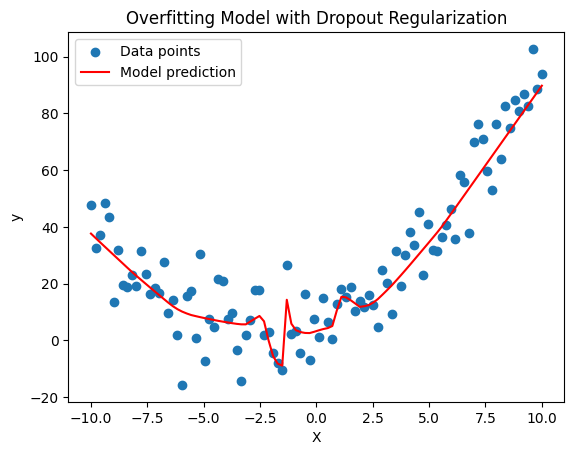

In [30]:
# Exercise 4 -Apply Dropout Regularization technique to the same OverfittingModel

class DropoutOverfittingModel(OverfittingModel):
    def __init__(self, p=0.5):
        super(DropoutOverfittingModel, self).__init__()
        self.dropout = nn.Dropout(p)
        # During training, randomly zeroes some of the elements of the input tensor with probability p.
        # The zeroed elements are chosen independently for each forward call and are sampled from a Bernoulli distribution.
        # Each channel will be zeroed out independently on every forward call.

    def forward(self, x):
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.dropout(torch.relu(self.fc2(x)))
        x = self.dropout(torch.relu(self.fc3(x)))
        x = self.dropout(torch.relu(self.fc4(x)))
        return self.fc5(x)

# Train the dropout model
dropout_model = DropoutOverfittingModel(p=0.2) # You can experiment with different dropout rates
dropout_model = train_model(dropout_model, X, y, num_epochs=1000) # Use the original train_model

# Plot results for the dropout model
plot_model(dropout_model, X, y, 'Overfitting Model with Dropout Regularization')

Early stopping at epoch 112


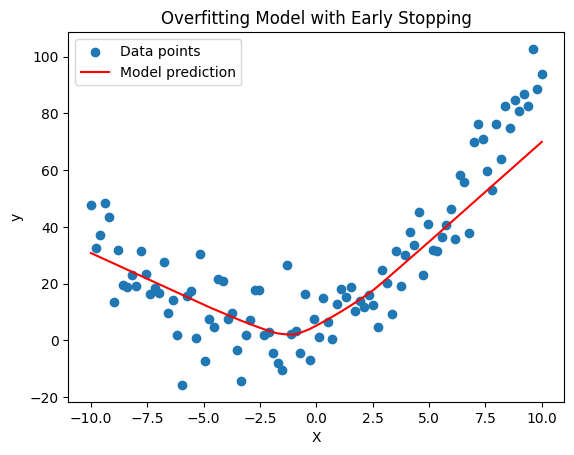

In [31]:
# Exercise 5 -Apply Early Stopping technique to the same OverfittingModel

def train_model_with_early_stopping(model, X, y, num_epochs=1000, learning_rate=0.001, patience=50):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Split data into training and validation sets
    # Simple split for demonstration
    split_ratio = 0.8
    split_index = int(len(X) * split_ratio)
    X_train, X_val = X[:split_index], X[split_index:]
    y_train, y_val = y[:split_index], y[split_index:]

    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32).unsqueeze(1)
    y_val_tensor = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)

    best_val_loss = float('inf')
    epochs_no_improve = 0

    for epoch in range(num_epochs):
        model.train()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Evaluate on validation set
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_tensor)
            val_loss = criterion(val_outputs, y_val_tensor)

        # Early stopping check
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
            # Optional: Save the best model state
            # torch.save(model.state_dict(), 'best_model.pth')
        else:
            epochs_no_improve += 1
            if epochs_no_improve == patience:
                print(f'Early stopping at epoch {epoch+1}')
                break

    return model

# Apply early stopping to the original OverfittingModel
early_stopping_model = OverfittingModel()
early_stopping_model = train_model_with_early_stopping(early_stopping_model, X, y, num_epochs=1000, patience=100)

# Plot results for the early stopping model
plot_model(early_stopping_model, X, y, 'Overfitting Model with Early Stopping')

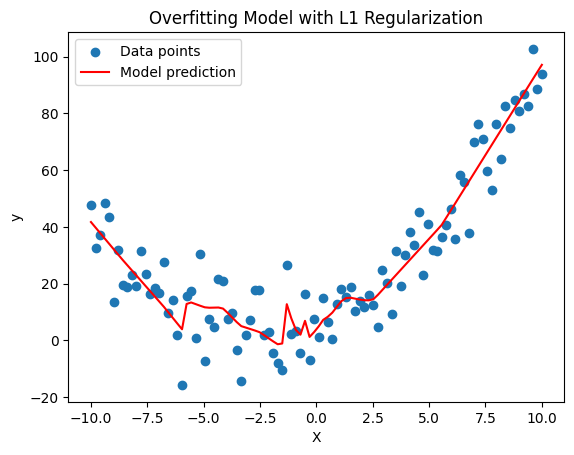

In [32]:
# Exercise 6 - Apply L1 (Lasso) Regularization technique to the same OverfittingModel

# Function to train model with L1 regularization
def train_model_with_l1_regularization(model, X_train, y_train, num_epochs=1000, learning_rate=0.001, l1_lambda=0.001):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)
    y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

    for epoch in range(num_epochs):
        model.train()
        outputs = model(X_train)
        mse_loss = criterion(outputs, y_train)

        # Calculate L1 regularization term
        l1_norm = sum(p.abs().sum() for p in model.parameters())

        # Total loss with regularization
        loss = mse_loss + l1_lambda * l1_norm

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return model

# Apply L1 regularization to the original OverfittingModel
l1_regularized_model = OverfittingModel()
l1_regularized_model = train_model_with_l1_regularization(l1_regularized_model, X, y, num_epochs=1000, l1_lambda=0.001) # Adjust lambda as needed

# Plot results for the L1 regularized model
plot_model(l1_regularized_model, X, y, 'Overfitting Model with L1 Regularization')

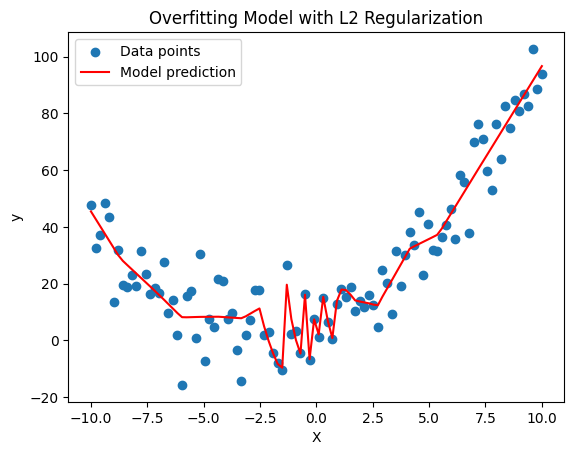

In [33]:
# Exercise 7 - Apply L2 (Ridge) Regularization technique to the same OverfittingModel

# Function to train model with L2 regularization
def train_model_with_l2_regularization(model, X_train, y_train, num_epochs=1000, learning_rate=0.001, l2_lambda=0.001):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)
    y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

    for epoch in range(num_epochs):
        model.train()
        outputs = model(X_train)
        mse_loss = criterion(outputs, y_train)

        # Calculate L2 regularization term
        #l1_norm = sum(p.abs().sum() for p in model.parameters())
        l2_norm = sum(p.pow(2).sum() for p in model.parameters())

        # Total loss with regularization
        loss = mse_loss + l2_lambda * l2_norm

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return model

# Apply L2 regularization to the original OverfittingModel
l2_regularized_model = OverfittingModel()
l2_regularized_model = train_model_with_l2_regularization(l2_regularized_model, X, y, num_epochs=1000, l2_lambda=0.001) # Adjust lambda as needed

# Plot results for the L2 regularized model
plot_model(l2_regularized_model, X, y, 'Overfitting Model with L2 Regularization')